<a href="https://colab.research.google.com/github/SudipDg/DeepLearningModel/blob/main/generative_deep_learning_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/davidADSP/GDL_code.git

Cloning into 'GDL_code'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 394 (delta 0), reused 1 (delta 0), pack-reused 391
Receiving objects: 100% (394/394), 22.13 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [3]:
!python3 -V

Python 3.10.12


## ***The next line of code may not be required.***

In [4]:
!pip install virtualenv virtualenvwrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 16.5 MB/s eta 0:00:00


In [5]:
!pip install -r ./GDL_code/requirements.txt

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-c1_chwen
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-c1_chwen
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
import keras
print(keras.__version__)

2.15.0


In [7]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [8]:
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [10]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [11]:
x_train[54, 12, 13, 1]

0.36862746

In [12]:
np.shape(x_train)




(50000, 32, 32, 3)

In [13]:
np.shape(x_test)

(10000, 32, 32, 3)

In [14]:
np.shape(y_train)

(50000, 10)

In [15]:
np.shape(y_test)

(10000, 10)

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([
Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation = 'softmax'),
])




In [17]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
input_layer = Input(shape=(32,32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])

In [20]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8525 - accuracy: 0.3322
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6730 - accuracy: 0.4049
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5954 - accuracy: 0.4319
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5431 - accuracy: 0.4496
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5010 - accuracy: 0.4652
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4673 - accuracy: 0.4803
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4405 - accuracy: 0.4863
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4157 - accuracy: 0.4941
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3916 - accuracy: 0.5051
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - 

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4416 - accuracy: 0.4852


[1.4415587186813354, 0.4851999878883362]

In [24]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 5ms/step


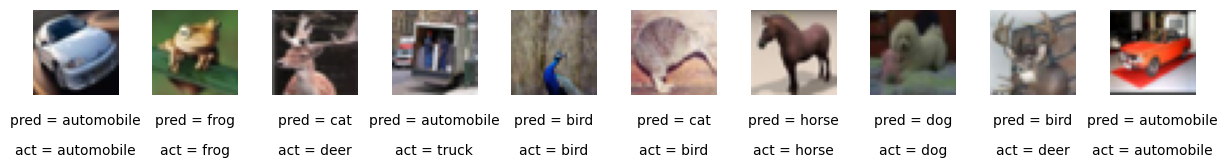

In [32]:
import numpy as np
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img=x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

In [35]:
from keras.layers import Input, Conv2D

input_layer = Input(shape=(64,64,1))
conv_layer_1 = Conv2D(filters = 2, kernel_size = (3,3), strides = 1, padding = "same")
(input_layer)


<KerasTensor: shape=(None, 64, 64, 1) dtype=float32 (created by layer 'input_4')>

In [40]:
from keras.layers import Input, Conv2D, Flatten, Dense
from keras.models import Model
input_layer = Input(shape=(32,32,3))
conv_layer_1 = Conv2D(filters = 10, kernel_size = (4,4), strides = 2, padding = 'same')(input_layer)
conv_layer_2 = Conv2D(filters = 20, kernel_size = (3,3), strides = 2, padding = 'same')(conv_layer_1)
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [42]:
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 10)        490       
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 20)          1820      
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

input_layer = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = 3
, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)
x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [47]:
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [51]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])

In [52]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)

Epoch 1/10
1563/1563 [==============================] - 140s 88ms/step - loss: 1.5346 - accuracy: 0.4609
Epoch 2/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.1377 - accuracy: 0.5993
Epoch 3/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9928 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9050 - accuracy: 0.6826
Epoch 5/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.8484 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7987 - accuracy: 0.7211
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7510 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7135 - accuracy: 0.7494
Epoch 9/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6804 - accuracy: 0.7610
Epoch 10/10
1563/1563 [==============================] 

In [53]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.8760 - accuracy: 0.6991


[0.8759685754776001, 0.6991000175476074]

In [54]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 14s 45ms/step


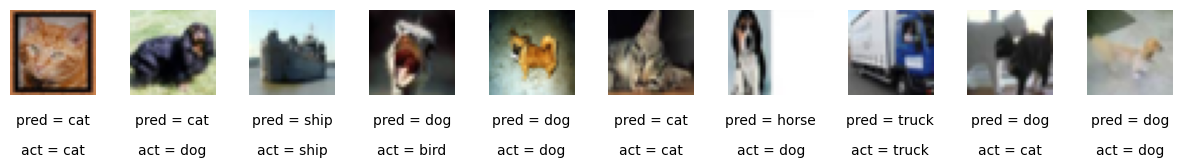

In [56]:
import numpy as np
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img=x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)